# DataSet

## Conjunto de Dados IMDB

O conjunto de dados IMDB contém 50.000 análises em inglês de filmes, que são classificadas em positivas e negativas. Pela natureza dos dados, a abordagem a ser utilizada será de processamento de linguegem natural (NLP).

### Link para Download da base:
[IMDB Dataset of 50K Movie Reviews - Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r"data\IMDB Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Como podemos perceber pela próxima célula, as classes já vem perfeiramente balanceadas

In [3]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
df['review'].loc[23]

'First of all, let\'s get a few things straight here: a) I AM an anime fan- always has been as a matter of fact (I used to watch Speed Racer all the time in Preschool). b) I DO like several B-Movies because they\'re hilarious. c) I like the Godzilla movies- a lot.<br /><br />Moving on, when the movie first comes on, it seems like it\'s going to be your usual B-movie, down to the crappy FX, but all a sudden- BOOM! the anime comes on! This is when the movie goes WWWAAAAAYYYYY downhill.<br /><br />The animation is VERY bad & cheap, even worse than what I remember from SPEED RACER, for crissakes! In fact, it\'s so cheap, one of the few scenes from the movie I "vividly" remember is when a bunch of kids run out of a school... & it\'s the same kids over & over again! The FX are terrible, too; the dinosaurs look worse than Godzilla. In addition, the transition to live action to animation is unorganized, the dialogue & voices(especially the English dub that I viewed) was horrid & I was begging 

Ao observar alguns registros, se encontra a tag html de quebra de linha, o `<br />`. Como a tag representa uma quebra de linha, os registros vão receber uma substituição para `'\n'` para que a String possua o mesmo comportamento.

In [3]:
df['review'] = df['review'].apply(lambda x: x.replace('<br />', '\n'))

In [6]:
print(df['review'].loc[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.

The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.

It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.

I would say the main appeal of the show is due to the fact that it goes where other sho

## Nuvem de palavras

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")


oi

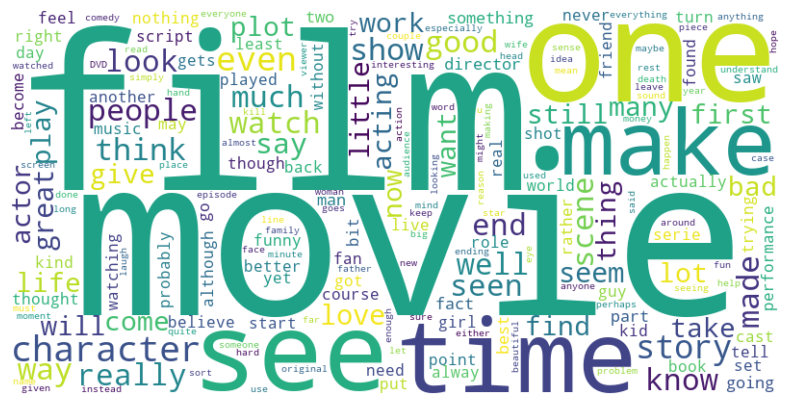

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def make_WordCloud(text,color="viridis"):
    nuvem = WordCloud(width=800, height=400, background_color='white',colormap=color).generate(text)

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis('off')  # Não mostrar os eixos
    plt.show()


make_WordCloud(" ".join(df["review"]))

In [28]:
def clean_review(doc):
    return " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])

df["clean review"] = df["review"].apply(lambda review: clean_review(nlp(review)))

df["clean review"] 

0        reviewers mentioned watching 1 Oz episode hook...
1        wonderful little production \n\n filming techn...
2        thought wonderful way spend time hot summer we...
3        Basically family little boy Jake thinks zombie...
4        Petter Mattei Love Time Money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going disagree previous comment Maltin second ...
49999    expects Star Trek movies high art fans expect ...
Name: clean review, Length: 50000, dtype: object

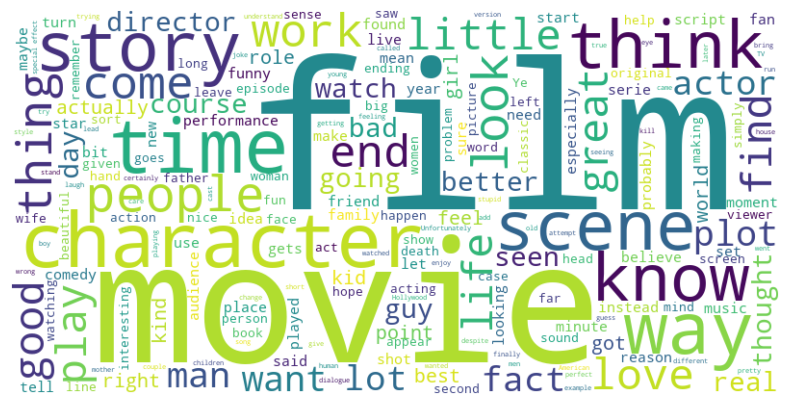

In [30]:
make_WordCloud(" ".join(df["clean review"]))

A nuvem de palavras do Dataset total demonstra o grande uso dos termos "film" e "movie", denotando a característica de uma review se referir a obra como objeto de discussão, outras palavras importantes são "time", "people", "story" e "character" e "scene" que denotam certas características do filme, demonstrando a importância da duração do filme, elenco, composição das cenas e roteiro.

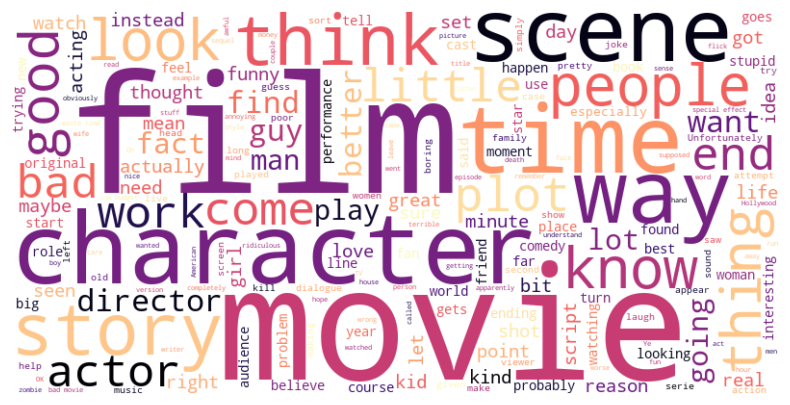

In [33]:
make_WordCloud(" ".join(df["clean review"].loc[df["sentiment"] == "negative"]), color="magma")

Na Nuvem de palavras negativas, podemos perceber uma frequência menor de palavras consideradas "negativas" do que o esperado. Algumas menções vão para: "bad", "poor", "Unfortunately"...

Outro fator interessante de se observar são palavras "positivas" como "good" e "better" aparecendo com certa representatividade, isso pode acontecer tanto por ironia das Reviews, quanto insatisfação, que poderia ser algo como "esse filme poderia ser melhor..." ou "esse filme não é bom..."

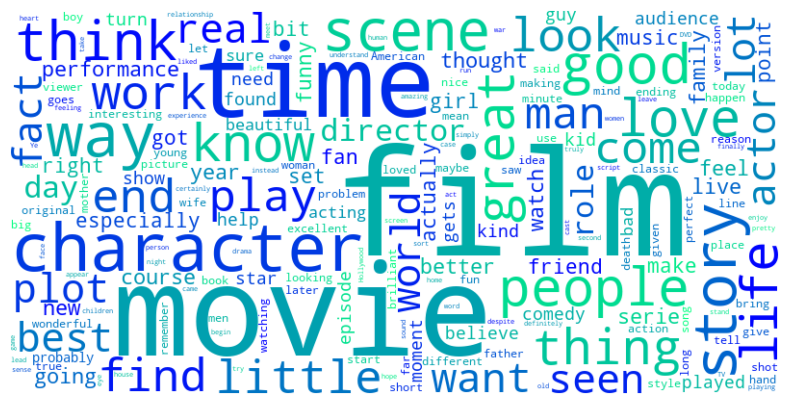

In [45]:
make_WordCloud(" ".join(df["clean review"].loc[df["sentiment"] == "positive"]), color="winter")

Ao se comparar a nuvem de palavras positivas, percebemos um maior uso de adjetivos e palavras relacionadas a sentimentos, como "feel","love", "funny" 

## TF-IDF

Term Frequency (TF) Inverse Document Frequency (IDF) é um modelo estatístico que mensura a frequência de um termo em um documento, assim como a importância e relações entre o corpo da frase e relações com outros documentos. Ao se passar uma Feature para o modelo, é retornado uma matriz com diversas colunas

Explicação da técnica: https://www.youtube.com/watch?v=vZAXpvHhQow

In [4]:
from sklearn.model_selection import train_test_split

X = df['review']  # this time we want to look at the text
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nota: A feature selecionada para o TF-IDF foi "review" sem a remoção das StopWords pois o algoritmo possui instrumentais e parâmetros para solucionar o uso de StopWords em seu treinamento. 

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(40000, 93002)

Podemos ver que o conjunto de treino ao se transformar em uma matriz possui 40 mil registros e 93 mil colunas, um valor muito expressivo de features, logo podemos considerar o uso do SVM para sua alta dimensionalidade

In [22]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

#Term frequency
# Inverse Document Frequency
# TFIDF(t,d) = TF(t, d) x IDF(t)
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [23]:

predictions = text_clf.predict(X_test)

### Matriz de confusão com os dados de teste

<Axes: >

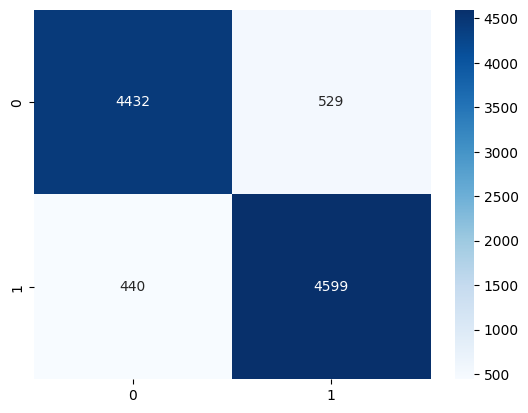

In [24]:
import seaborn as sns
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')


In [25]:
# Métricas do treinamento
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.90      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [6]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(text_clf, X, y, cv=cross_val)

# Exibir os resultados
print("Acurácia em cada fold:", scores)
print("Acurácia média:", np.mean(scores))

Acurácia em cada fold: [0.9031 0.8988 0.9042 0.8997 0.8973]
Acurácia média: 0.90062


Podemons considerar que o TF-IDF juntamente com o LinearSVC obtiveram bons resultados. O Modelo treinado com varias partiões de treino (Fold) obteve valores bem homogêneos e próximos de sí.

Precision, Recall e F1-Score tiveram a média de 90% nas duas classes, demonstrando que o modelo acabou se adequando bem aos dados e o balanceamento das classes foi efetiva para esse treinamento.

## GridSearch

É um método para Otimizar hiperparâmetros, o qual podemos aplicar em uma PipeLine. 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definindo os parâmetros para otimização
param_grid = {
    'clf__C': [0.1, 0.5, 0.7 , 1.0],  # Parâmetro de regularização
    'tfidf__max_df': [0.75, 0.85, 0.95, 1.0],  # Ignorar palavras que aparecem em mais de 75%, 85%, 95% e 100% dos documentos
    'tfidf__min_df': [1, 2],  # Ignorar palavras que aparecem em menos de 1 ou 2 documentos
}

# Realizar a busca em grade
grid_search = GridSearchCV(text_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# # Exibir previsões
# for text, pred in zip(X_test, y_pred):
#     print(f'Texto: "{text}" - Classe Prevista: {pred}')

# Melhor hiperparâmetros encontrados
print("\nMelhores Hiperparâmetros:")
print(grid_search.best_params_)

Matriz de Confusão:
[[4433  528]
 [ 424 4615]]

Relatório de Classificação:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.90      0.92      0.91      5039

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Melhores Hiperparâmetros:
{'clf__C': 0.5, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1}


Foi aplicado o GridShearch para localizar os melhores hiperprâmetros de C (Parâmetro de Regularização) para o LinearSVC e tamanhos máximos e mínimos de frequência de termos para o TF-IDF.

Os Resultados foram:

In [13]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(max_df=0.75,
                                               min_df=1)),
                     ('clf', LinearSVC(C=0.5))])

text_clf.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.75)),
                ('clf', LinearSVC(C=0.5))])

In [14]:

predictions = text_clf.predict(X_test)

### Matriz de confusão com os dados de teste

<Axes: >

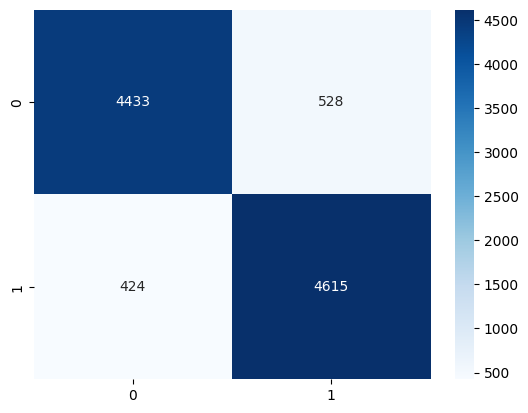

In [15]:
import seaborn as sns
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')


In [16]:
# Métricas do treinamento
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.90      0.92      0.91      5039

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [17]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(text_clf, X, y, cv=cross_val)

# Exibir os resultados
print("Acurácia em cada fold:", scores)
print("Acurácia média:", np.mean(scores))

Acurácia em cada fold: [0.9048 0.9027 0.905  0.9028 0.8972]
Acurácia média: 0.9025000000000001


Ao selecionar os hiperparâmetros que trazem uma melhor otimização para o modelo, não foi obtido melhoras, tendo  substâncias, tendo o aumento de apenas 1% em sua precisão, as outras métricas e treinamento particionado se mantiveram iguais.  

## Transformers

Transformes é um modelo mais complexo em sua arquitetura, são redes que possuem técnicas de encoding, decode e Attention que mapeia pares de entrada, atribuindo diversos pesos dependendo da relevância da pergunta (input do modelo)  


Para o modelo de arquitetura Transformers, será utilizado um modelo baseado na arquitetura BERT (Uma derivação do transformers que adapta diversas características da arquitetura) multi-lingual para análise de sentimentos.

In [30]:
from transformers import pipeline

model_sentiment = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)


c:\Users\JoaoOliveira\Desktop\projetinhos\transformers_test\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\JoaoOliveira\Desktop\projetinhos\transformers_test\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [31]:
# Teste de inferência do modelo
result = model_sentiment(df['review'].loc[0])

print(result)

[[{'label': 'positive', 'score': 0.11264445632696152}, {'label': 'neutral', 'score': 0.1544288545846939}, {'label': 'negative', 'score': 0.7329266667366028}]]


## Tokens Length

O modelo escolhido possui uma limitação no tamanho de tokens aceitos, sendo ele de 512. Como o dataframe possui reviews muito extensas, foi necessário criar uma nova coluna no dataset para saber o tamanho da sequência de tokens.

In [32]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Cria uma nova coluna com as reviews tokenizadas
df['review_tokenized'] = df['review'].apply(lambda x: tokenizer(x, return_tensors="pt"))




Token indices sequence length is longer than the specified maximum sequence length for this model (566 > 512). Running this sequence through the model will result in indexing errors


In [33]:

# Cria uma nova coluna com o tamanho do tensor
df['size_tensor'] = df['review_tokenized'].apply(lambda x: x['input_ids'].size()[1]) #.size retorna uma tupla, o indice 1 é onde se encontra o seu `lenght` por assim dizer

#df['review_tokenized'].loc[0]['input_ids'].size()

Na célula anterior, foi pego o tamanho do tensor de cada review tokenizada, dessa maneira podemos aplicar um filtro para a coluna size_tensor e selecionar os registros que possuem tamanho igual a inferior a 512. 

In [34]:
df = df.loc[df['size_tensor'] <= 512]

In [35]:
df.shape

(42438, 4)

Podemos perceber que o novo dataset tem um pouco mais de 42 mil registos, uma perca de 8 mil registros. Uma perca de 16% da base de dados.

Já em seu balanceamento, o dataset não sofreu muitas alterações, visto que a classe `negative` possui 50,2% de representatividade enquanto `positive` 49,8%

In [36]:
df['sentiment'].value_counts()

sentiment
negative    21314
positive    21124
Name: count, dtype: int64

In [129]:

# # Pré-tokenizando as entradas (garantindo que seja uma lista de strings)
# texts = df['review'].tolist()

# # Fazendo a predição com o modelo
# result = model_sentiment(texts)

# # Exibindo o resultado


In [114]:
# results = []


# counter = 0
# for row in df['review']:
#     results.append(model_sentiment(row))
#     counter += 1
#     if counter % 1000 == 0:
#         print(".")

## Remoção da Classe "neutral" do modelo

Como o dataset não possui a target `"neutral"`, foi necessário encontrar um método para remover este rótulo. Uma das formas mais simples foi aplicar a inferência e aplicar uma condicional para escolher sempre o valor mais relevante que não seja `"neutral"`

In [38]:
def predicto(row):
    """
    Faz a previsão de sentimento com base em uma entrada fornecida.

    A função utiliza um modelo de análise de sentimento para avaliar a entrada 
    e retorna o rótulo correspondente ao sentimento predominante, que pode ser 
    'positive', 'neutral' ou 'negative'. Se houver empates, o rótulo 'neutral' 
    será descartado, e, nesse caso, será considerado o segundo maior valor de 
    pontuação.

    Parâmetros:
    row (str): review que será avaliada.
    
    
    Explicação do método .predict do modelo:

    Recebe uma lista contendo a entrada a ser analisada, onde cada elemento 
                é um dicionário com as chaves 'label' e 'score'
                [
                    [{'label': 'positive', 'score': valor1},
                     {'label': 'neutral', 'score': valor2},
                     {'label': 'negative', 'score': valor3}]
                ]

    Retorna:
    str: O rótulo do sentimento com a maior pontuação, exceto 'neutral'.

    Exemplo de saída:
    'positive' ou 'negative'

    """
    obj = model_sentiment.predict(row)
    max_score = obj[0][0] 
    for line_obj in obj[0][1:]:
        if line_obj['score'] >= max_score['score'] and line_obj['label'] != 'neutral':
            max_score = line_obj

    return max_score['label']

In [39]:
df['predict'] = df['review'].apply(predicto)

In [40]:
# Matriz com os resultados
matrix_class = df[['sentiment','predict']].copy()

matrix_class = pd.get_dummies(matrix_class, drop_first=True, dtype=int)

matrix_class


,sentiment_positive,predict_positive
0,1,0
1,1,1
2,1,0
3,0,0
4,1,1
...,...,...
49995,1,0
49996,0,0
49997,0,0
49998,0,0


In [42]:
matrix_labed = matrix_class.copy()

matrix_labed['real'] = "negative"
matrix_labed['predict'] = "negative"


matrix_labed.loc[matrix_labed['sentiment_positive'] == 1, 'real'] = "positive" 
matrix_labed.loc[matrix_labed['predict_positive'] == 1, 'predict'] = "positive" 


### Matriz de confusão

<Axes: >

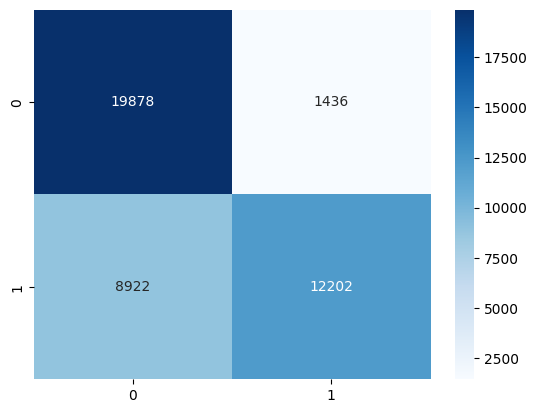

In [44]:
import seaborn as sns

cf_matrix = metrics.confusion_matrix(matrix_labed['real'],matrix_labed['predict'])
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [46]:
from sklearn.metrics import classification_report

# Métricas do treinamento
print(classification_report(matrix_labed['real'],matrix_labed['predict']))

              precision    recall  f1-score   support

    negative       0.69      0.93      0.79     21314
    positive       0.89      0.58      0.70     21124

    accuracy                           0.76     42438
   macro avg       0.79      0.76      0.75     42438
weighted avg       0.79      0.76      0.75     42438



Como o modelo já estava treinado, não foi necessário criar uma divisão entre teste e treino assim como partições de treino (Fold).

Suas métricas foram Inferiores ao TF-IDF com LinearSVC

Em média, o algoritmo obteve 79% em precisão, 76% em Recall e 75% em F1-Score, com acurácia média de 76%.

Para a classe **`"negative"`**, o modelo obteve:

- **Precisão:** 69%
- **Recall:** 93%
- **F1-Score:** 79%

Para a classe **`"positive"`**, os resultados foram:

- **Precisão:** 89%
- **Recall:** 58%
- **F1-Score:** 70%

Ao considerar o F1-Score como métrica para avaliar a performance na previsão das classes, podemos concluir que o modelo classifica melhor a categoria **`"negative"`**.


# TF-IDF + LinearSVC Vs Transformers
------------------

O TF-IDF + LinearSVC obteve melhores resultados do que o Modelo Transformers já treinado e utilizado nesse estudo, não precisando abidicar de nenhum registro da base de dados. Vale ressaltar, que um modelo Transformers criado especificamente para essa base de dados, poderia ter resultados completamente diferentes.

Ao se fazer um modelo de processamento de linguagem natural, podemos considerar os seguintes prós e contras de cada abordagem:

### Prós TF-IDF + LinearSVC

- Eficácia alta em um sistema especificado;
- Inferência e processamento alto;
- Determinístico.

### Contras TF-IDF + LinearSVC

- Não é flexivel uma vez treinado;
- Geralmente vai apenas uma língua;
- Limitado se usado sozinho, por exemplo: Não conseguiria entender o contexto de mensagens enviadas uma após a outra em um chatbot que possuem relação.

### Prós Transformers

- É mais flexivel e pode ser usado em outros contextos;
- Pode entender mais de uma língua;
- Captura contexto

### Contras Transformers

- Exige poder computacinal;
- Tem limite de tamanho da sequência/vetor de Tokens;
- Pode performar pior se não adaptado aos dados que vão ser utilizados